<a href="https://colab.research.google.com/github/Ixiondbz/House-Prices-Prediction-Advanced-Regression-Techniques-/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
df=pd.read_csv("https://raw.githubusercontent.com/Ixiondbz/House-Prices-Prediction-Advanced-Regression-Techniques-/main/train.csv")

In [7]:
featuresWithNA=[features for features in df.columns if df[features].isnull().sum()>1]

In [8]:
featuresWithNA

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [9]:
len(featuresWithNA)

18

In [10]:
df.shape

(1460, 81)

In [11]:
len([features for features in df.columns if df[features].isnull().sum()>0])

19

In [12]:
for feature in featuresWithNA:
    print(feature,np.round(df[feature].isnull().mean(),3))

LotFrontage 0.177
Alley 0.938
MasVnrType 0.005
MasVnrArea 0.005
BsmtQual 0.025
BsmtCond 0.025
BsmtExposure 0.026
BsmtFinType1 0.025
BsmtFinType2 0.026
FireplaceQu 0.473
GarageType 0.055
GarageYrBlt 0.055
GarageFinish 0.055
GarageQual 0.055
GarageCond 0.055
PoolQC 0.995
Fence 0.808
MiscFeature 0.963


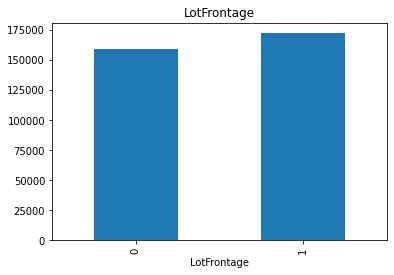

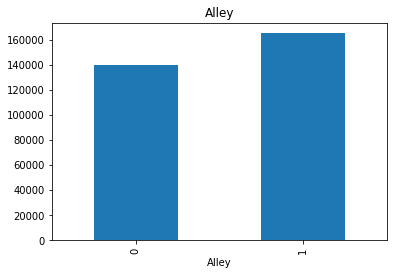

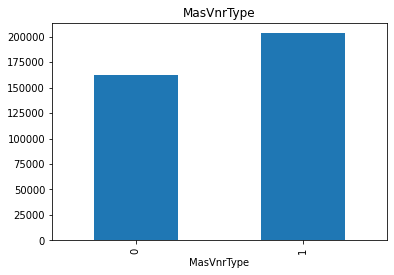

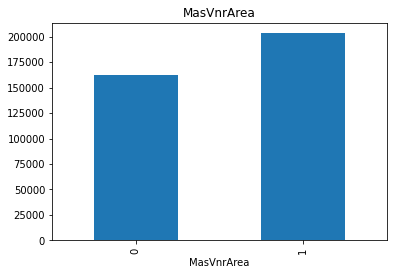

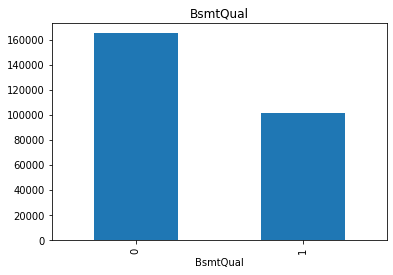

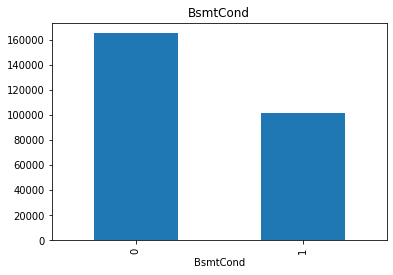

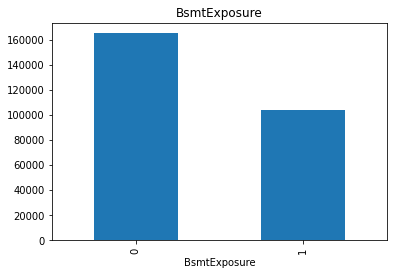

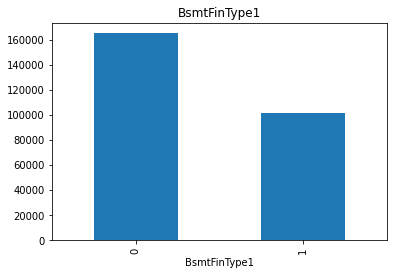

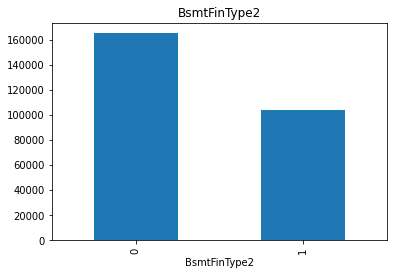

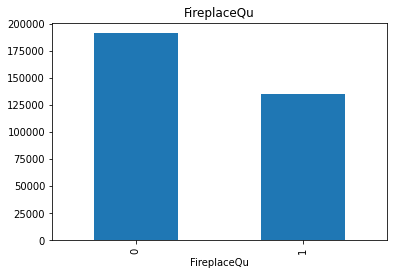

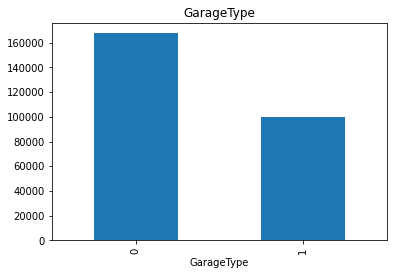

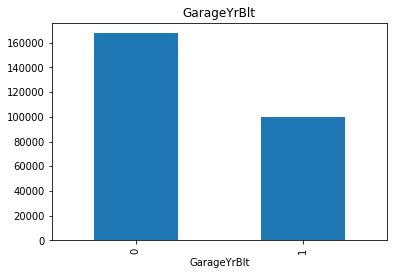

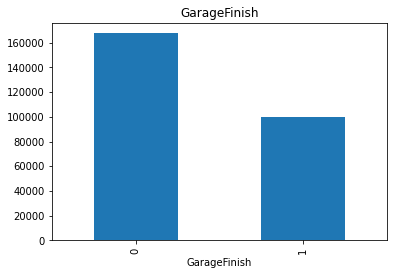

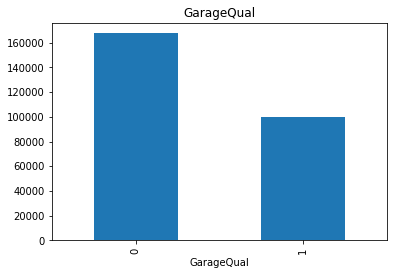

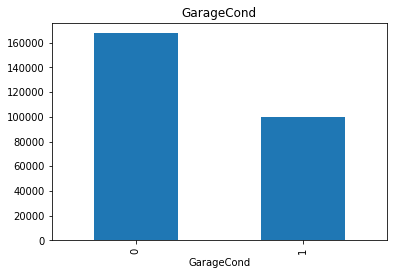

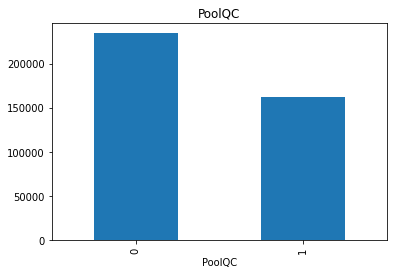

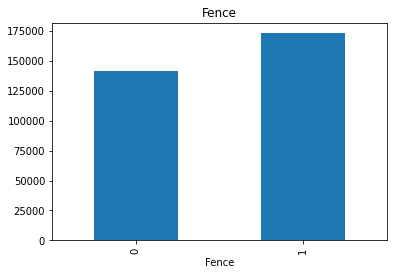

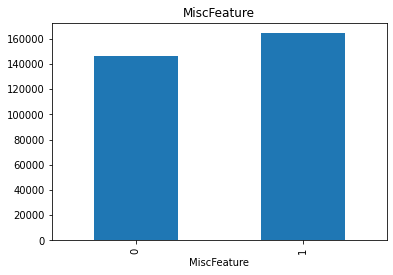

In [13]:
for feature in featuresWithNA:
    data=df.copy()
    data[feature]=np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [14]:
numericalFeatures=[feature for feature in df.columns if df[feature].dtypes!='O'] 
print(len(numericalFeatures))

38


In [15]:
81-38

43

In [16]:
df['YrSold'].dtype=='O'

False

In [17]:
numericalFeatures

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [18]:
len([feature for feature in df.columns if df[feature].dtypes=='int64'])

35

In [19]:
len(numericalFeatures)

38

In [20]:
[feature for feature in numericalFeatures if 'Yr' in feature or 'Year' in feature]

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [21]:
yearFeatures=[feature for feature in numericalFeatures if 'Yr' in feature or 'Year' in feature]

In [22]:
yearFeatures

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [23]:
for feature in yearFeatures:
    print(feature,df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

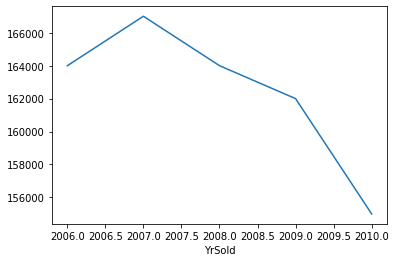

In [24]:
df.groupby('YrSold')['SalePrice'].median().plot()

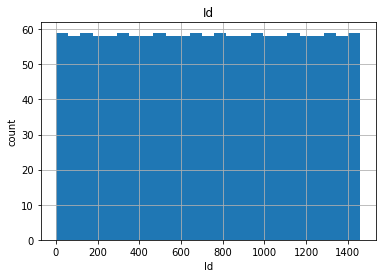

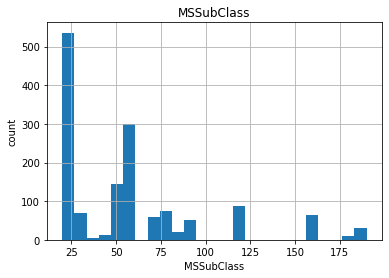

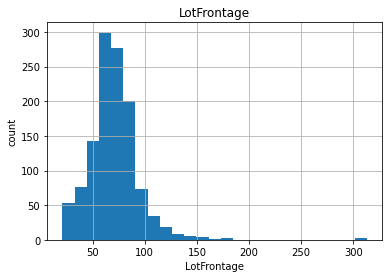

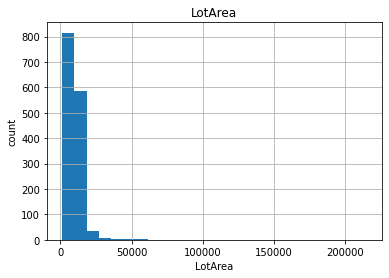

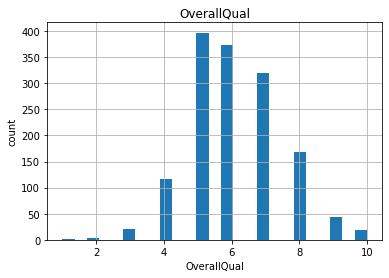

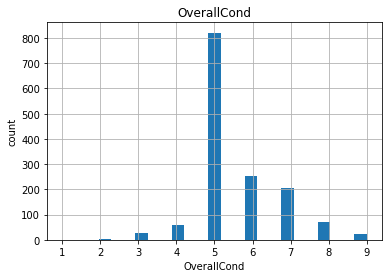

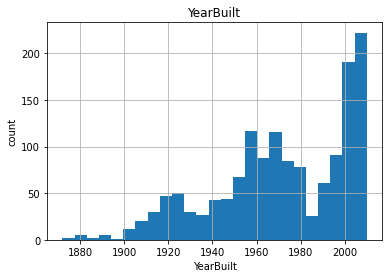

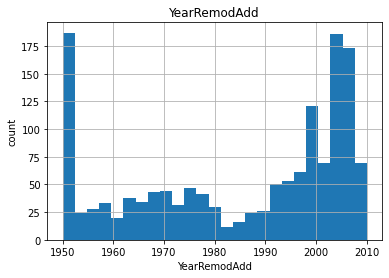

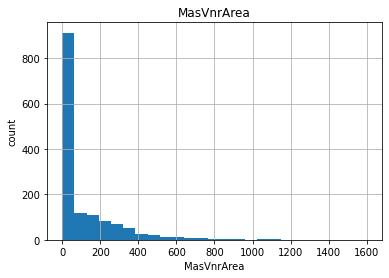

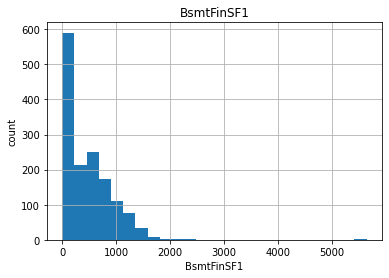

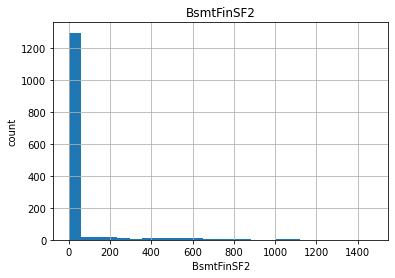

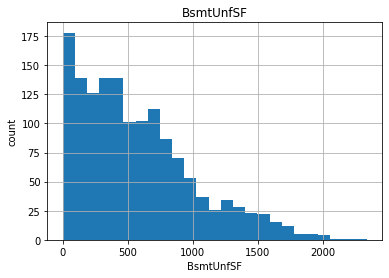

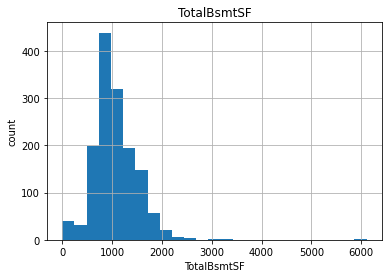

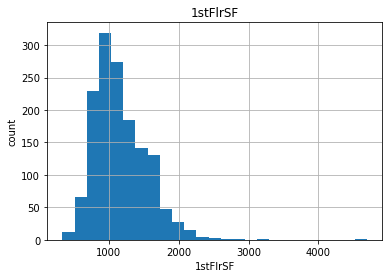

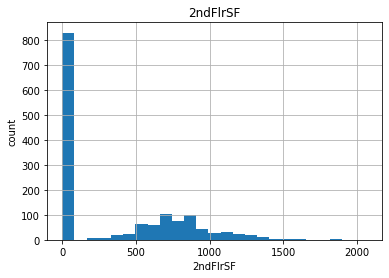

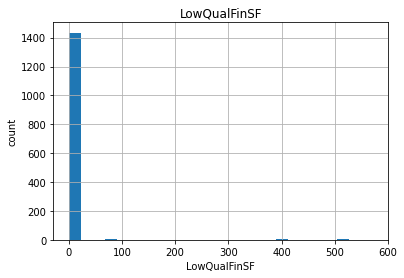

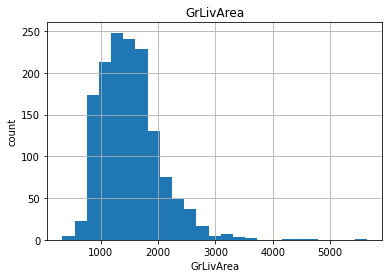

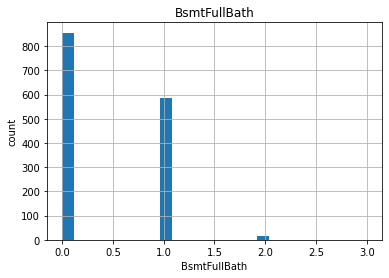

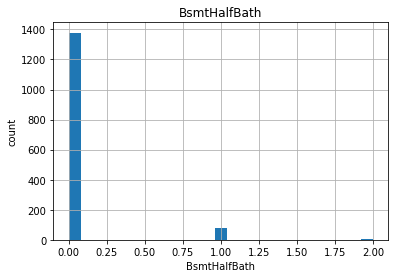

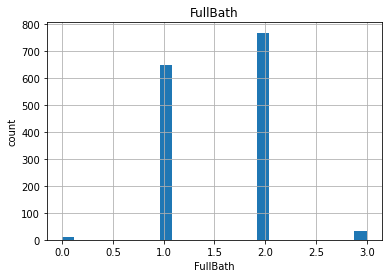

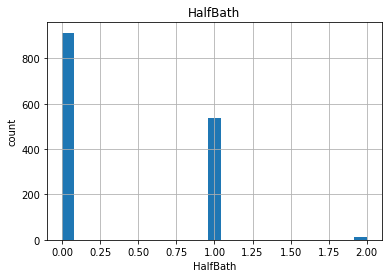

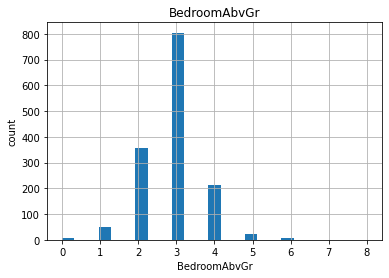

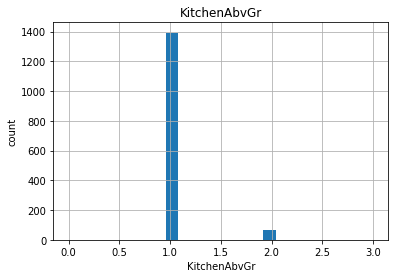

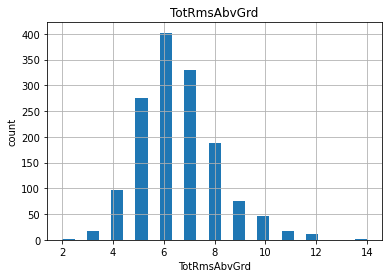

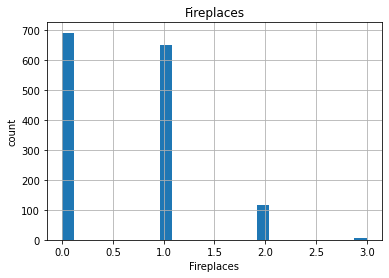

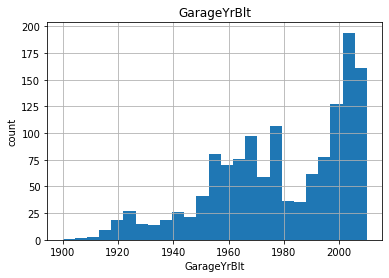

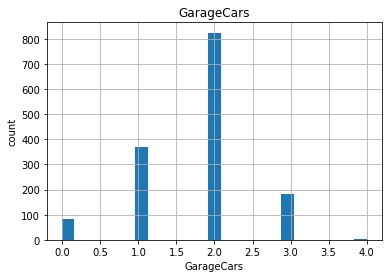

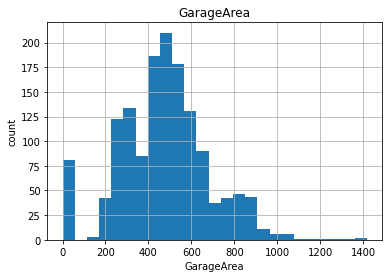

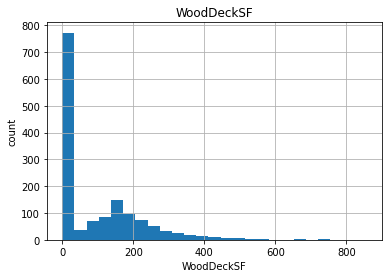

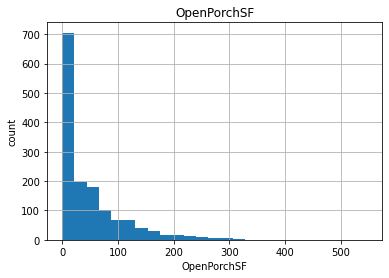

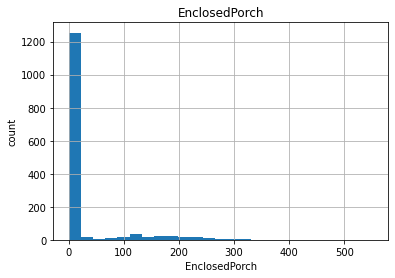

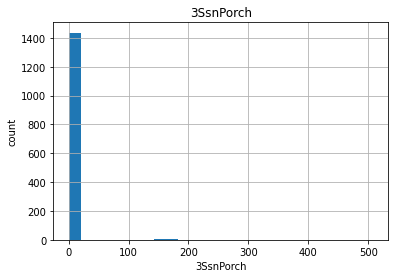

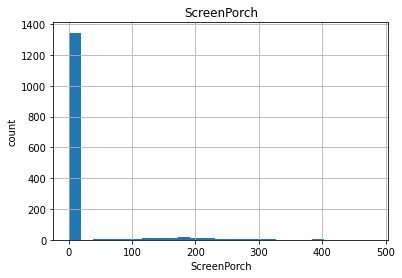

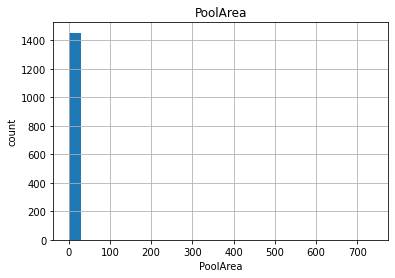

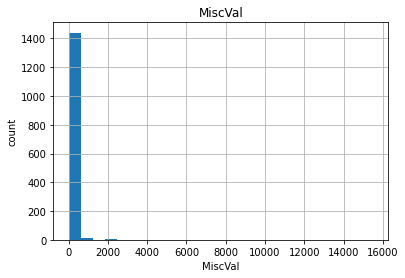

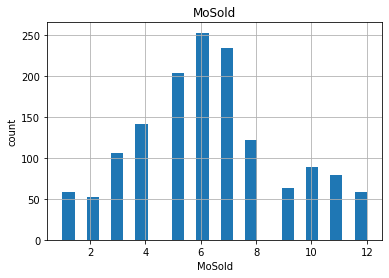

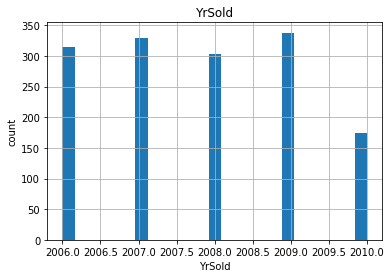

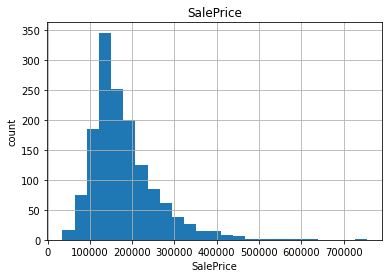

In [25]:
for feature in numericalFeatures:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

In [26]:
continuousFeatures=[feature for feature in numericalFeatures if feature not in yearFeatures+['Id']+['SalePrice']]

In [27]:
len(continuousFeatures)

32

In [28]:
discreteFeatures = [feature for feature in numericalFeatures if len(df[feature].unique())<25 and feature not in yearFeatures+['Id']]

In [29]:
len(discreteFeatures)

17

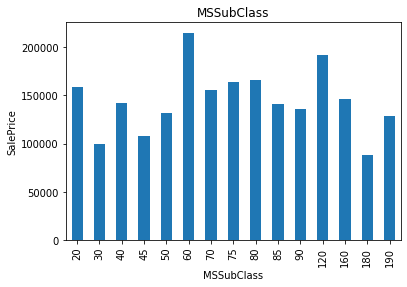

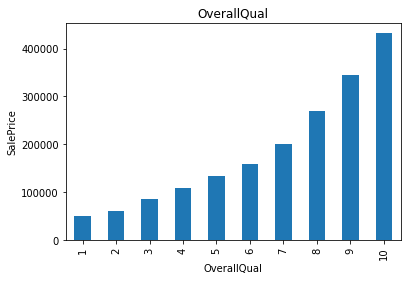

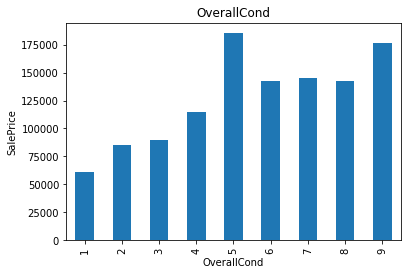

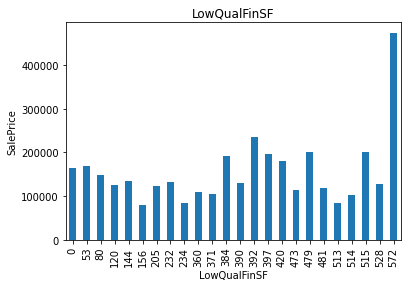

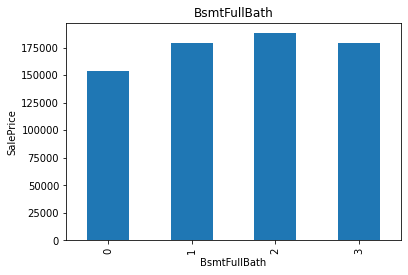

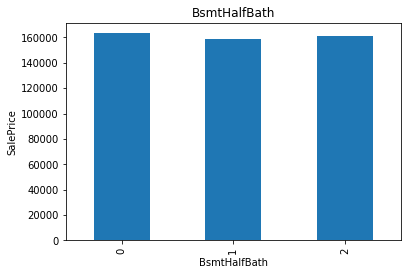

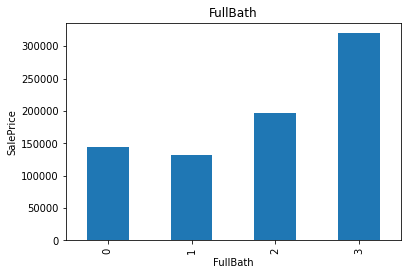

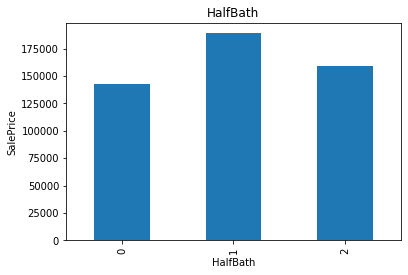

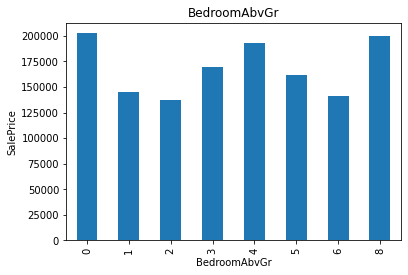

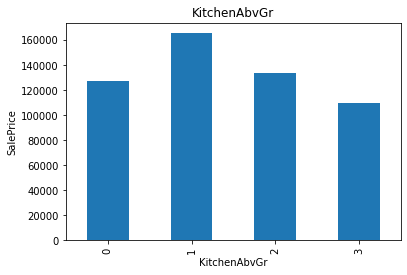

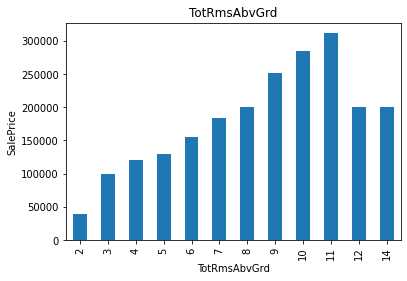

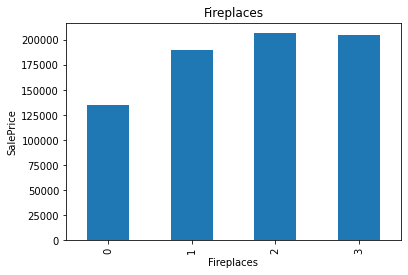

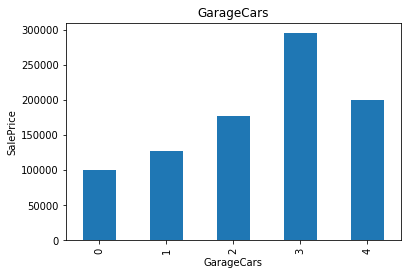

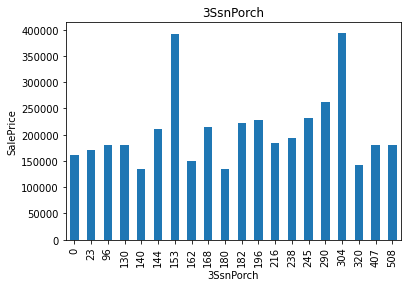

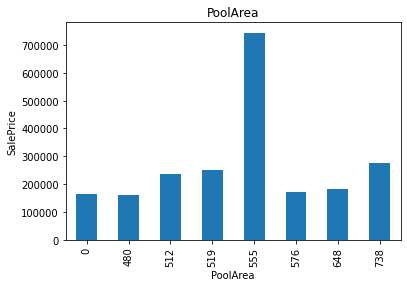

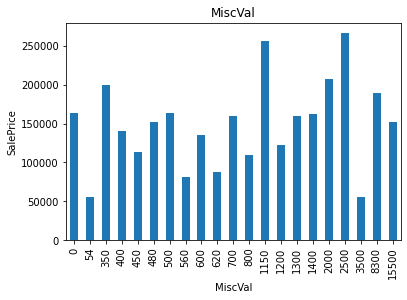

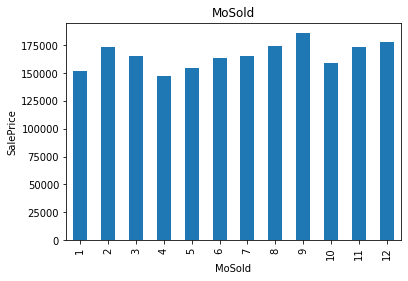

In [30]:
for feature in discreteFeatures:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [31]:
continuousFeatures=[feature for feature in numericalFeatures if feature not in discreteFeatures+
                    yearFeatures+['Id']+['SalePrice']]

In [32]:
len(continuousFeatures)

15

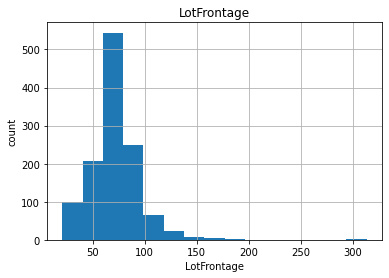

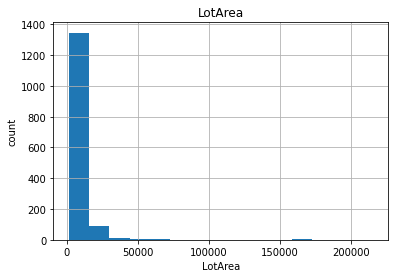

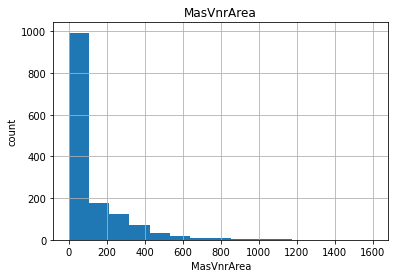

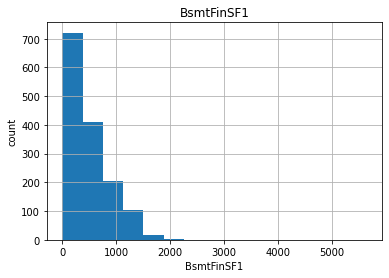

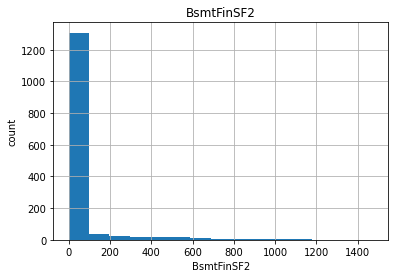

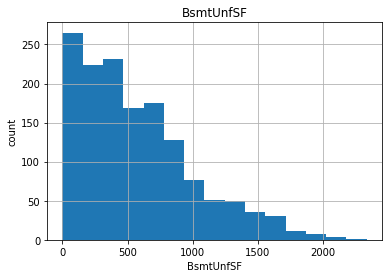

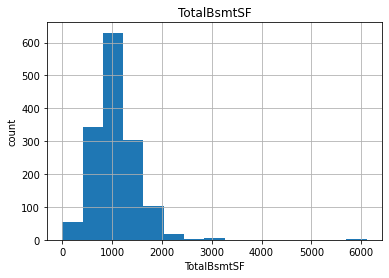

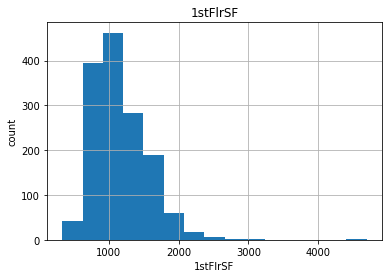

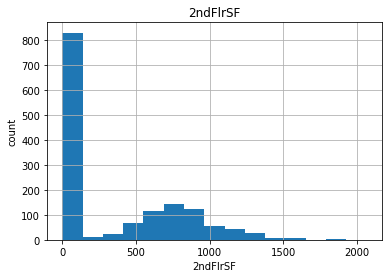

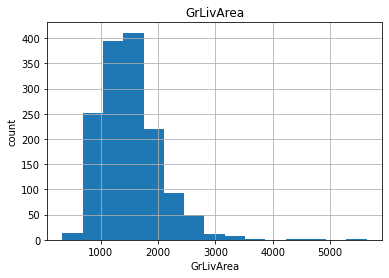

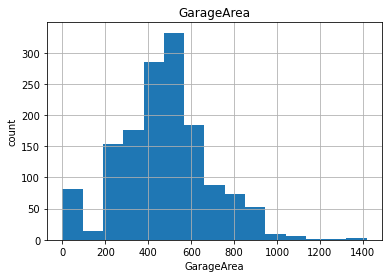

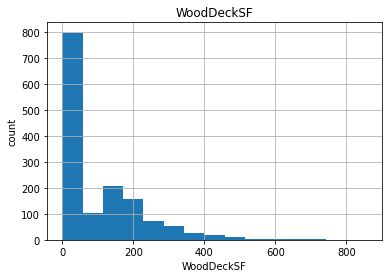

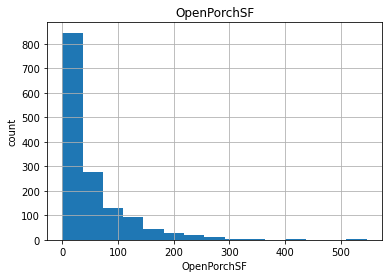

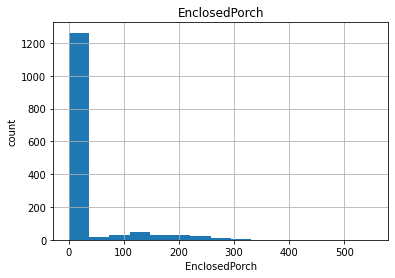

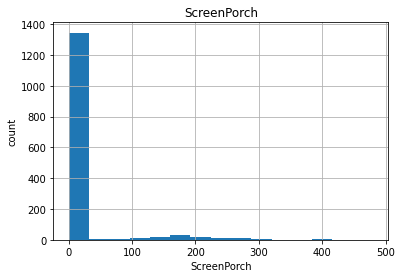

In [33]:
for feature in continuousFeatures:
    data=df.copy()
    data[feature].hist(bins=15)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

In [34]:
df.shape

(1460, 81)

In [35]:
df['1stFlrSF'].dtype

dtype('int64')

In [36]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [37]:
df.head().dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [38]:
for feature in df.columns:
    print(feature, df[feature].dtype)

Id int64
MSSubClass int64
MSZoning object
LotFrontage float64
LotArea int64
Street object
Alley object
LotShape object
LandContour object
Utilities object
LotConfig object
LandSlope object
Neighborhood object
Condition1 object
Condition2 object
BldgType object
HouseStyle object
OverallQual int64
OverallCond int64
YearBuilt int64
YearRemodAdd int64
RoofStyle object
RoofMatl object
Exterior1st object
Exterior2nd object
MasVnrType object
MasVnrArea float64
ExterQual object
ExterCond object
Foundation object
BsmtQual object
BsmtCond object
BsmtExposure object
BsmtFinType1 object
BsmtFinSF1 int64
BsmtFinType2 object
BsmtFinSF2 int64
BsmtUnfSF int64
TotalBsmtSF int64
Heating object
HeatingQC object
CentralAir object
Electrical object
1stFlrSF int64
2ndFlrSF int64
LowQualFinSF int64
GrLivArea int64
BsmtFullBath int64
BsmtHalfBath int64
FullBath int64
HalfBath int64
BedroomAbvGr int64
KitchenAbvGr int64
KitchenQual object
TotRmsAbvGrd int64
Functional object
Fireplaces int64
FireplaceQu object

In [39]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [40]:
for feature in df.columns:
    if df[feature].dtype!='O':
        print(feature)

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


In [41]:
for feature in df.columns:
    if df[feature].dtype=='O':
        print(feature)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [42]:
for feature in df.columns:
    if df[feature].dtype!='O':
        print(feature, df[feature].dtype)

Id int64
MSSubClass int64
LotFrontage float64
LotArea int64
OverallQual int64
OverallCond int64
YearBuilt int64
YearRemodAdd int64
MasVnrArea float64
BsmtFinSF1 int64
BsmtFinSF2 int64
BsmtUnfSF int64
TotalBsmtSF int64
1stFlrSF int64
2ndFlrSF int64
LowQualFinSF int64
GrLivArea int64
BsmtFullBath int64
BsmtHalfBath int64
FullBath int64
HalfBath int64
BedroomAbvGr int64
KitchenAbvGr int64
TotRmsAbvGrd int64
Fireplaces int64
GarageYrBlt float64
GarageCars int64
GarageArea int64
WoodDeckSF int64
OpenPorchSF int64
EnclosedPorch int64
3SsnPorch int64
ScreenPorch int64
PoolArea int64
MiscVal int64
MoSold int64
YrSold int64
SalePrice int64


In [43]:
for feature in df.columns:
    if df[feature].dtype=='O' and df[feature].isnull().sum()>0:
        print(feature,df[feature].isnull().sum())

Alley 1369
MasVnrType 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [44]:
for feature in df.columns:
    if df[feature].dtype!='O' and df[feature].isnull().sum()>0:
        print(feature,df[feature].isnull().sum())

LotFrontage 259
MasVnrArea 8
GarageYrBlt 81


### Filling NA values of Catergorical Features

In [45]:
df.drop(['Alley'],axis=1,inplace=True)

In [46]:
df.drop(['MiscFeature'],axis=1,inplace=True)
df.drop(['PoolQC'],axis=1,inplace=True)

In [47]:
df.drop(['Fence'],axis=1,inplace=True)

In [48]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [49]:
df['MasVnrType'].isna().sum()

8

In [50]:
df['MasVnrType'].isnull().sum()

8

In [51]:
df['MasVnrType']

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1460, dtype: object

In [52]:
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

In [53]:
for feature in df.columns:
    if df[feature].dtype=='O' and df[feature].isnull().sum()>0:
        print(feature,df[feature].isnull().sum())

BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageFinish 81
GarageQual 81
GarageCond 81


In [54]:
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [55]:
for feature in df.columns:
    if df[feature].dtype=='O' and df[feature].isnull().sum()>0:
        df[feature] = df[feature].fillna(df[feature].mode()[0])

In [56]:
for feature in df.columns:
    if df[feature].dtype=='O' and df[feature].isnull().sum()>0:
        print(feature,df[feature].isnull().sum())

### Filling missing values of Numerical Features 

In [57]:
for feature in df.columns:
    if df[feature].dtype!='O' and df[feature].isnull().sum()>0:
        print(feature,df[feature].isnull().sum())

LotFrontage 259
MasVnrArea 8
GarageYrBlt 81


In [58]:
for feature in df.columns:
    if df[feature].dtype!='O' and df[feature].isnull().sum()>0:
        df[feature] = df[feature].fillna(df[feature].mode()[0])

In [59]:
for feature in df.columns:
    if df[feature].dtype!='O' and df[feature].isnull().sum()>0:
        print(feature,df[feature].isnull().sum())

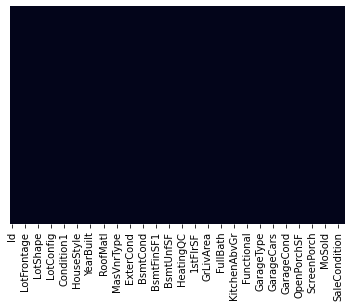

In [60]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

### Id values don't contribute to prediction 

In [61]:
df.drop(['Id'],axis=1,inplace=True)

### Converting Categorical Variables to Numerical Variables

In [62]:
Categorical = [feature for feature in df.columns if df[feature].dtype=='O']

In [63]:
len(Categorical)

39

In [64]:
Numerical = [feature for feature in df.columns if df[feature].dtype!='O']

In [65]:
len(Numerical)

37

In [66]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


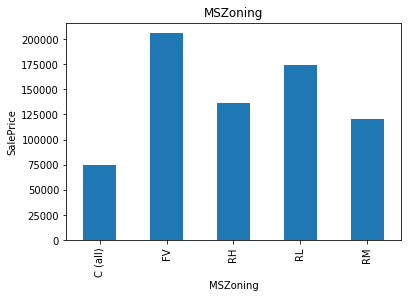

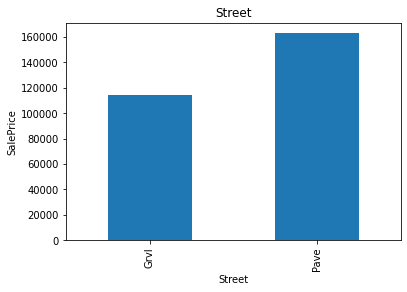

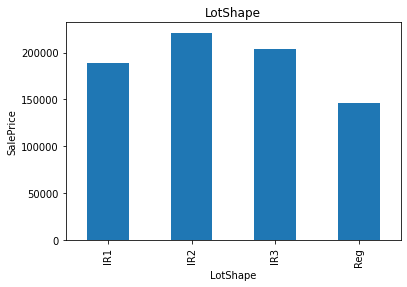

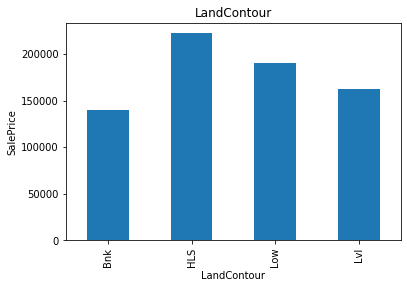

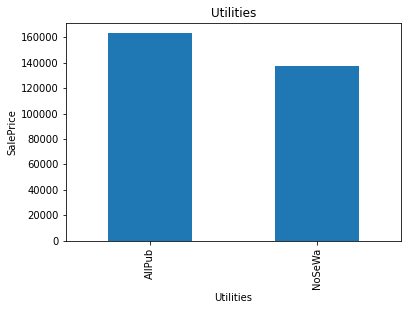

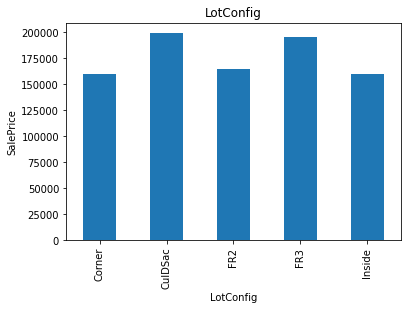

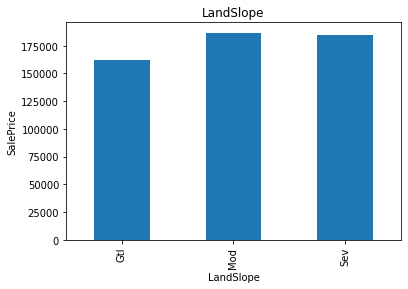

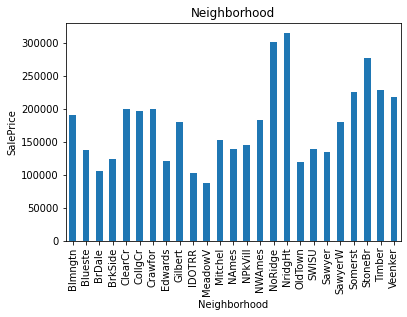

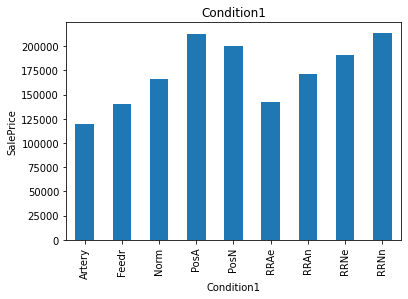

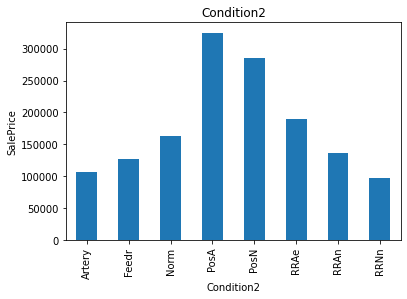

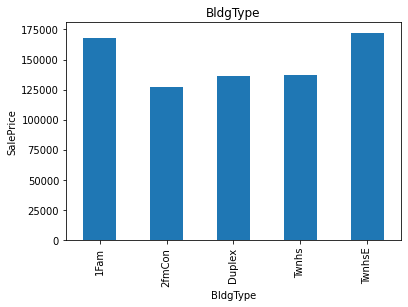

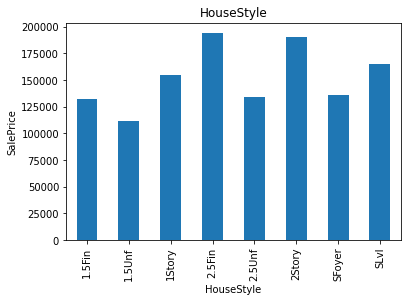

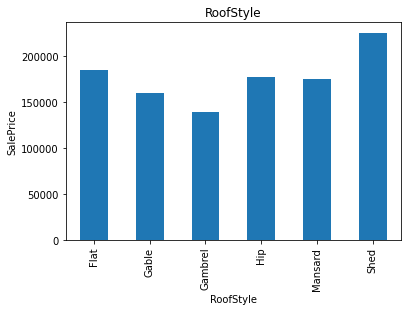

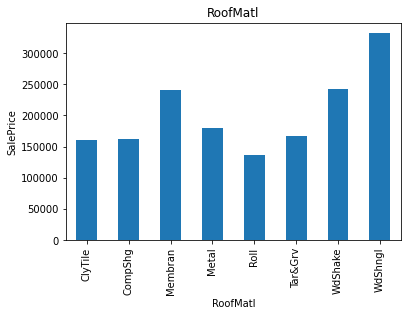

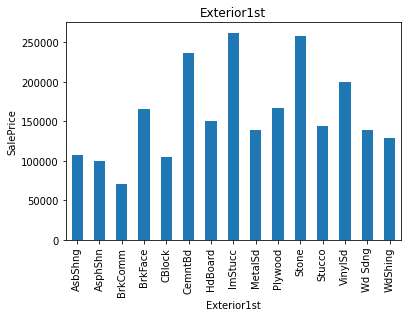

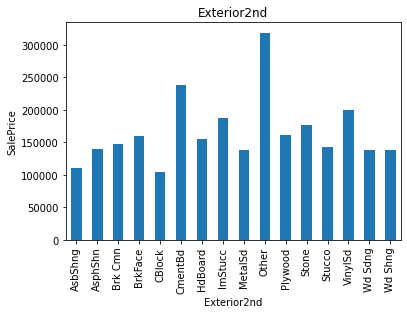

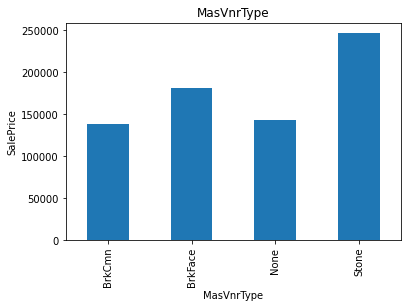

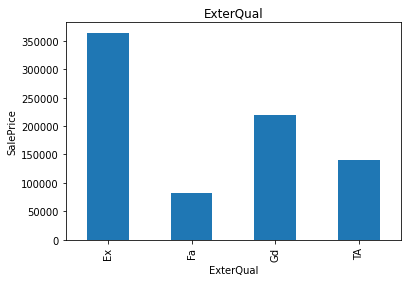

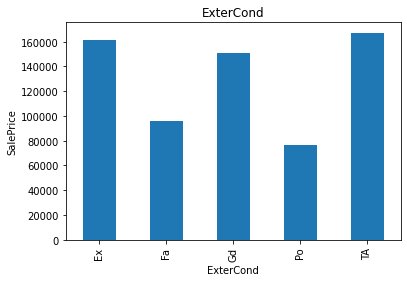

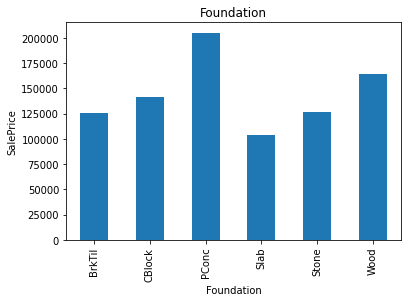

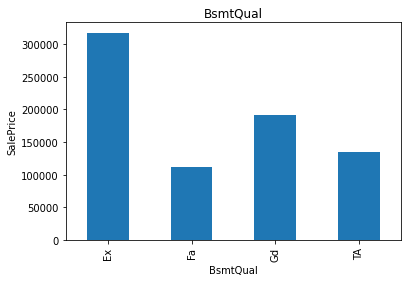

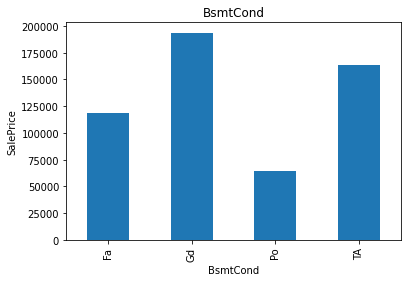

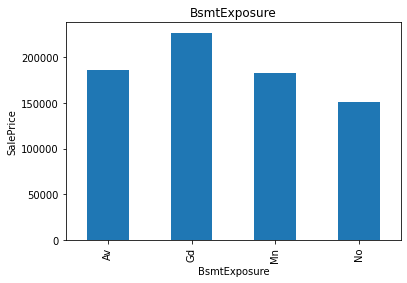

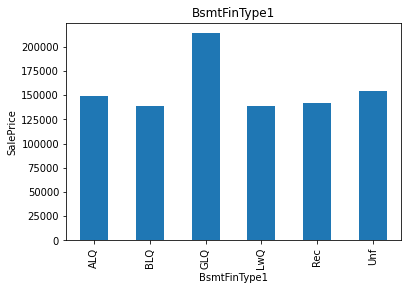

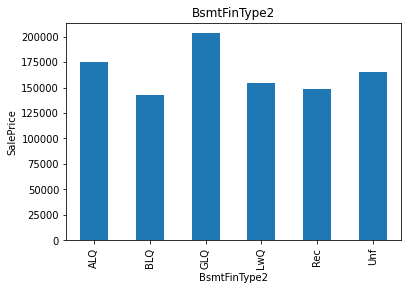

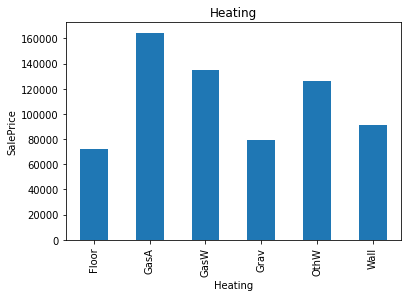

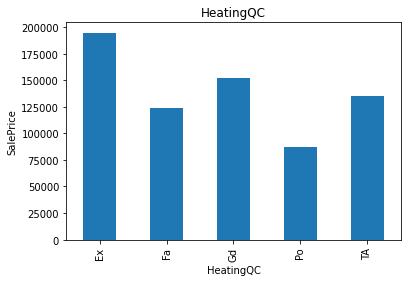

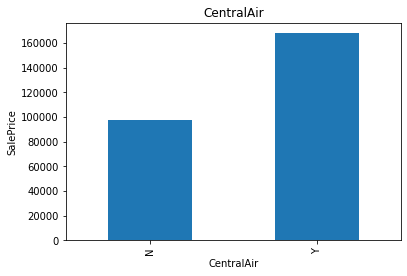

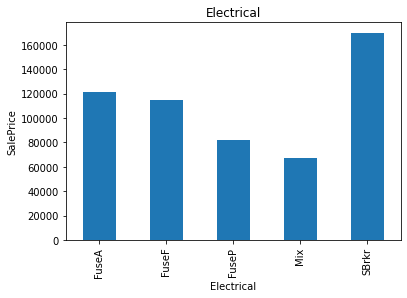

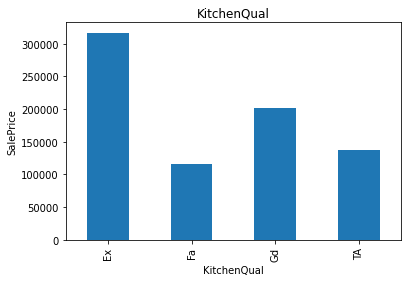

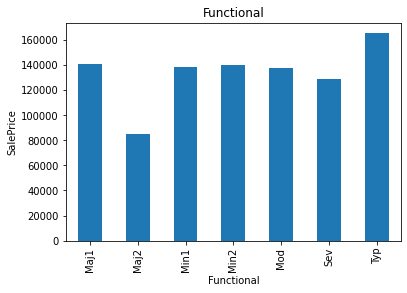

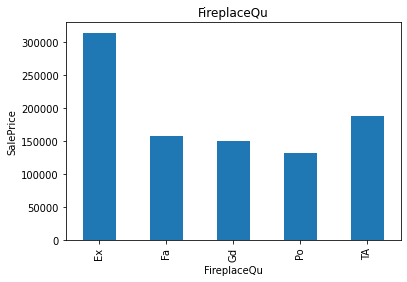

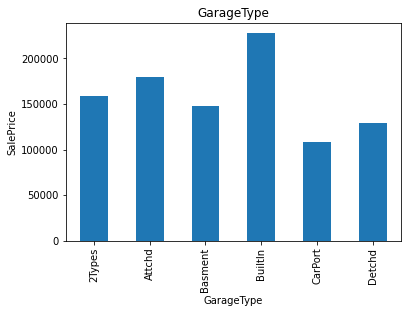

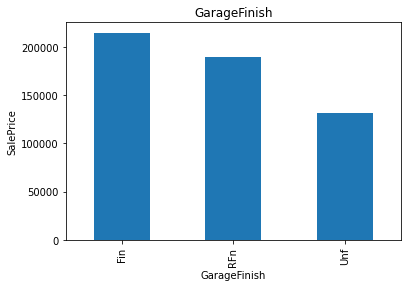

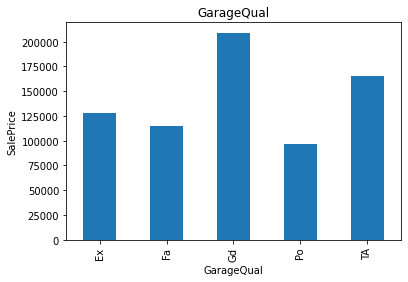

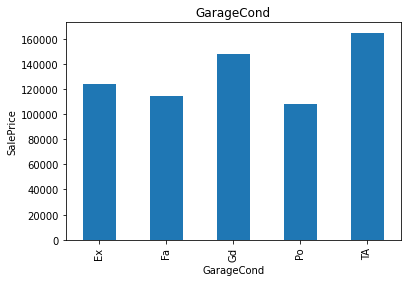

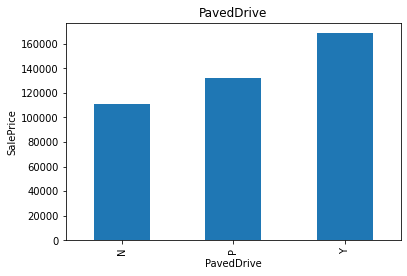

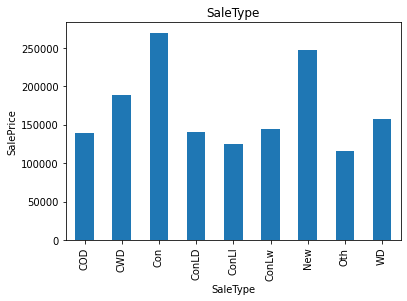

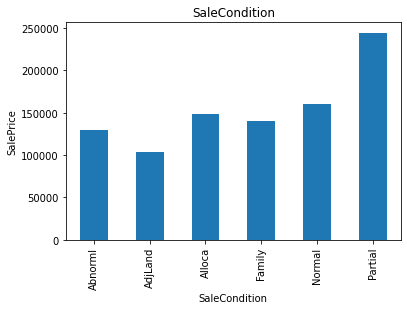

In [67]:
for feature in Categorical:
  data=df.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()

In [68]:
df_en = df.copy()

In [69]:
df_en['MSSubClass_']=pd.factorize(df.MSSubClass)[0]

In [70]:
df_en['MSZoning_']=pd.factorize(df.MSZoning)[0]

In [71]:
df_en['LotFrontage_']=pd.factorize(df.LotFrontage)[0]

In [72]:
df_en['LotArea_']=pd.factorize(df.LotArea)[0]

In [73]:
df_en['LotShape_']=pd.factorize(df.LotShape)[0]

In [74]:
df_en['LandContour_']=pd.factorize(df.LandContour)[0]

In [75]:
df_en['Utilitiies_']=pd.factorize(df.Utilities)[0]

In [76]:
df_en['LotConfig_']=pd.factorize(df.LotConfig)[0]

In [77]:
df_en['LandSlope_']=pd.factorize(df.LandSlope)[0]

In [78]:
df_en['Neighborhood_']=pd.factorize(df.Neighborhood)[0]

In [79]:
df_en['Condition1_']=pd.factorize(df.Condition1)[0]

In [80]:
df_en['Condition2_']=pd.factorize(df.Condition2)[0]

In [81]:
df_en['BldgType_']=pd.factorize(df.BldgType)[0]

In [82]:
df_en['HouseStyle']=pd.factorize(df.HouseStyle)[0]

In [83]:
df_en['OverallQual_']=pd.factorize(df.OverallQual)[0]

In [84]:
df_en['OverallCond_']=pd.factorize(df.OverallCond)[0]

In [85]:
df_en['YearBuilt_']=pd.factorize(df.YearBuilt)[0]

In [86]:
df_en['YearRemodAdd_']=pd.factorize(df.YearRemodAdd)[0]

In [87]:
df_en['RoofStyle_']=pd.factorize(df.RoofStyle)[0]

In [88]:
df_en['RoofMatl_']=pd.factorize(df.RoofMatl)[0]

In [89]:
df_en['Exterior1st_']=pd.factorize(df.Exterior1st)[0]

In [90]:
df_en['Exterior2nd_']=pd.factorize(df.Exterior2nd)[0]

In [91]:
df_en['MasVnrType_']=pd.factorize(df.MasVnrType)[0]

In [92]:
df_en['MasVnrArea_']=pd.factorize(df.MasVnrArea)[0]

In [93]:
df_en['ExterQual_']=pd.factorize(df.ExterQual)[0]

In [94]:
df_en['ExterCond_']=pd.factorize(df.ExterCond)[0]

In [95]:
df_en['BsmtQual_']=pd.factorize(df.BsmtQual)[0]

In [96]:
df_en['BsmtCond_']=pd.factorize(df.BsmtCond)[0]

In [97]:
df_en['BsmtExposure_']=pd.factorize(df.BsmtExposure)[0]

In [98]:
df_en['BsmtFinType1_']=pd.factorize(df.BsmtFinType1)[0]

In [99]:
df_en['BsmtFinSF1_']=pd.factorize(df.BsmtFinSF1)[0]

In [100]:
df_en['BsmtFinType2_']=pd.factorize(df.BsmtFinType2)[0]

In [101]:
df_en['BsmtFinSF2_']=pd.factorize(df.BsmtFinSF2)[0]

In [102]:
df_en['TotalBsmtSF_']=pd.factorize(df.TotalBsmtSF)[0]

In [103]:
df_en['Heating_']=pd.factorize(df.Heating)[0]

In [104]:
df_en['HeatingQC_']=pd.factorize(df.HeatingQC)[0]

In [105]:
df_en['Electrical_']=pd.factorize(df.Electrical)[0]

In [106]:
df_en['KitchenQual_']=pd.factorize(df.KitchenQual)[0]

In [107]:
df_en['Functitonal_']=pd.factorize(df.Functional)[0]

In [108]:
df_en['FireplaceQu_']=pd.factorize(df.FireplaceQu)[0]

In [109]:
df_en['GarageType_']=pd.factorize(df.GarageType)[0]

In [110]:
df_en['GarageFinish_']=pd.factorize(df.GarageFinish)[0]

In [111]:
df_en['GarageQual_']=pd.factorize(df.GarageQual)[0]

In [112]:
df_en['GarageCond_']=pd.factorize(df.GarageCond)[0]

In [113]:
df_en['SaleType_']=pd.factorize(df.SaleType)[0]

In [114]:
df_en['SaleCondition_']=pd.factorize(df.SaleCondition)[0]

In [115]:
df_en.drop(columns=['MSSubClass','MSZoning','LotFrontage','LotArea','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','YearRemodAdd','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Heating','HeatingQC'], axis = 1, inplace = True)

In [116]:
df_en.head()

,Street,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSSubClass_,MSZoning_,...,LandContour_,Utilitiies_,LotConfig_,LandSlope_,Neighborhood_,Condition1_,Condition2_,BldgType_,OverallQual_,OverallCond_,YearBuilt_,YearRemodAdd_,RoofStyle_,RoofMatl_,Exterior1st_,Exterior2nd_,MasVnrType_,MasVnrArea_,ExterQual_,ExterCond_,BsmtQual_,BsmtCond_,BsmtExposure_,BsmtFinType1_,BsmtFinSF1_,BsmtFinType2_,BsmtFinSF2_,TotalBsmtSF_,Heating_,HeatingQC_,Electrical_,KitchenQual_,Functitonal_,FireplaceQu_,GarageType_,GarageFinish_,GarageQual_,GarageCond_,SaleType_,SaleCondition_
0,Pave,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Pave,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,1,0,...,0,0,1,0,1,1,0,0,1,1,1,1,0,0,1,1,1,1,1,0,0,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,Pave,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,0,0,...,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,2,0,0,0,0,2,0,2,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0
3,Pave,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,2,0,...,0,0,2,0,2,0,0,0,0,0,3,3,0,0,2,2,1,1,1,0,1,1,0,1,3,0,0,3,0,1,0,0,0,0,1,1,0,0,0,1
4,Pave,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,0,0,...,0,0,1,0,3,0,0,0,2,0,4,4,0,0,0,0,0,3,0,0,0,0,3,0,4,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0


In [117]:
df_en.drop(columns=['Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','SaleType','SaleType','SaleCondition'], axis = 1, inplace = True)

In [118]:
df_en.head()

,Street,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_,MSZoning_,LotFrontage_,LotArea_,LotShape_,LandContour_,Utilitiies_,LotConfig_,LandSlope_,Neighborhood_,Condition1_,Condition2_,BldgType_,OverallQual_,OverallCond_,YearBuilt_,YearRemodAdd_,RoofStyle_,RoofMatl_,Exterior1st_,Exterior2nd_,MasVnrType_,MasVnrArea_,ExterQual_,ExterCond_,BsmtQual_,BsmtCond_,BsmtExposure_,BsmtFinType1_,BsmtFinSF1_,BsmtFinType2_,BsmtFinSF2_,TotalBsmtSF_,Heating_,HeatingQC_,Electrical_,KitchenQual_,Functitonal_,FireplaceQu_,GarageType_,GarageFinish_,GarageQual_,GarageCond_,SaleType_,SaleCondition_
0,Pave,Y,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,Y,0,61,0,0,0,0,0,2,2008,208500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Pave,Y,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,Y,298,0,0,0,0,0,0,5,2007,181500,1,0,1,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,0,1,1,1,1,1,0,0,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,Pave,Y,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,Y,0,42,0,0,0,0,0,9,2008,223500,0,0,2,2,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,2,0,0,0,0,2,0,2,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0
3,Pave,Y,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,Y,0,35,272,0,0,0,0,2,2006,140000,2,0,3,3,1,0,0,2,0,2,0,0,0,0,0,3,3,0,0,2,2,1,1,1,0,1,1,0,1,3,0,0,3,0,1,0,0,0,0,1,1,0,0,0,1
4,Pave,Y,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,Y,192,84,0,0,0,0,0,12,2008,250000,0,0,4,4,1,0,0,1,0,3,0,0,0,2,0,4,4,0,0,0,0,0,3,0,0,0,0,3,0,4,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0


In [119]:
df.shape

(1460, 76)

In [120]:
df_en['HouseStyle_']=pd.factorize(df.HouseStyle)[0]

In [121]:
df_en['Foundation_']=pd.factorize(df.Foundation)[0]

In [122]:
df_en['BsmtUnfSF_']=pd.factorize(df.BsmtUnfSF)[0]

In [123]:
df_en.shape

(1460, 76)

In [124]:
df.shape

(1460, 76)

In [125]:
df_bn = df.copy()

In [126]:
df_bn['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [127]:
zoning_order = ['FV', 'RL', 'RH', 'RM', 'C (all)']

In [128]:
from sklearn.preprocessing import OrdinalEncoder

In [129]:
enco = OrdinalEncoder (categories=[zoning_order])

In [130]:
enco.fit(df_bn[['MSZoning']])

OrdinalEncoder(categories=[['FV', 'RL', 'RH', 'RM', 'C (all)']],
               dtype=<class 'numpy.float64'>)

In [131]:
final=pd.DataFrame(enco.transform(df_bn[['MSZoning']]))

In [132]:
df_bn['MSZoning']=final

In [133]:
df_bn['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [134]:
street_order = ['Pave', 'Grvl']

In [135]:
enco = OrdinalEncoder (categories=[street_order])

In [136]:
enco.fit(df_bn[['Street']])

OrdinalEncoder(categories=[['Pave', 'Grvl']], dtype=<class 'numpy.float64'>)

In [137]:
final=pd.DataFrame(enco.transform(df_bn[['Street']]))

In [138]:
df_bn['Street']=final

In [139]:
df_bn['Street'].unique()

array([0., 1.])

In [140]:
df_bn['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [141]:
lshape_order = ['IR2', 'IR3','IR1','Reg']

In [142]:
enco = OrdinalEncoder (categories=[lshape_order])

In [143]:
enco.fit(df_bn[['LotShape']])

OrdinalEncoder(categories=[['IR2', 'IR3', 'IR1', 'Reg']],
               dtype=<class 'numpy.float64'>)

In [144]:
final=pd.DataFrame(enco.transform(df_bn[['LotShape']]))

In [145]:
df_bn['LotShape']=final

In [146]:
df_bn['LandContour'].unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [147]:
lcont_order = ['HLS', 'Low','Lvl','Bnk']

In [148]:
enco = OrdinalEncoder (categories=[lcont_order])

In [149]:
enco.fit(df_bn[['LandContour']])

OrdinalEncoder(categories=[['HLS', 'Low', 'Lvl', 'Bnk']],
               dtype=<class 'numpy.float64'>)

In [150]:
final=pd.DataFrame(enco.transform(df_bn[['LandContour']]))

In [151]:
df_bn['LandContour']=final

In [152]:
df_bn['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [153]:
util_order = ['AllPub', 'NoSeWa']

In [154]:
enco = OrdinalEncoder (categories=[util_order])

In [155]:
enco.fit(df_bn[['Utilities']])

OrdinalEncoder(categories=[['AllPub', 'NoSeWa']], dtype=<class 'numpy.float64'>)

In [156]:
final=pd.DataFrame(enco.transform(df_bn[['Utilities']]))

In [157]:
df_bn['Utilities']=final

In [158]:
df_bn['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [159]:
lcon_order = ['CulDSac', 'FR3', 'FR2', 'Inside', 'Corner']

In [160]:
enco = OrdinalEncoder (categories=[lcon_order])

In [161]:
enco.fit(df_bn[['LotConfig']])

OrdinalEncoder(categories=[['CulDSac', 'FR3', 'FR2', 'Inside', 'Corner']],
               dtype=<class 'numpy.float64'>)

In [162]:
final=pd.DataFrame(enco.transform(df_bn[['LotConfig']]))

In [163]:
df_bn['LotConfig']=final

In [164]:
df_bn['LandSlope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [165]:
lslope_order = ['Mod', 'Sev', 'Gtl']

In [166]:
enco = OrdinalEncoder (categories=[lslope_order])

In [167]:
enco.fit(df_bn[['LandSlope']])

OrdinalEncoder(categories=[['Mod', 'Sev', 'Gtl']],
               dtype=<class 'numpy.float64'>)

In [168]:
final=pd.DataFrame(enco.transform(df_bn[['LandSlope']]))

In [169]:
df_bn['LandSlope']=final

In [170]:
df_bn['Condition1'].unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

In [171]:
con1_order = ['PosA', 'PosN', 'RRNn', 'RRNe', 'RRAn', 'Norm', 'RRAe', 'Feedr', 'Artery']

In [172]:
enco = OrdinalEncoder (categories=[con1_order])

In [173]:
enco.fit(df_bn[['Condition1']])

OrdinalEncoder(categories=[['PosA', 'PosN', 'RRNn', 'RRNe', 'RRAn', 'Norm',
                            'RRAe', 'Feedr', 'Artery']],
               dtype=<class 'numpy.float64'>)

In [174]:
final=pd.DataFrame(enco.transform(df_bn[['Condition1']]))

In [175]:
df_bn['Condition1']=final

In [176]:
df_bn['Condition2'].unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)

In [177]:
con2_order = ['PosA', 'PosN', 'RRAe', 'Norm', 'RRAn', 'Feedr', 'Artery', 'RRNn']

In [178]:
enco = OrdinalEncoder (categories=[con2_order])

In [179]:
enco.fit(df_bn[['Condition2']])

OrdinalEncoder(categories=[['PosA', 'PosN', 'RRAe', 'Norm', 'RRAn', 'Feedr',
                            'Artery', 'RRNn']],
               dtype=<class 'numpy.float64'>)

In [180]:
final=pd.DataFrame(enco.transform(df_bn[['Condition2']]))

In [181]:
df_bn['Condition2']=final

In [182]:
df_bn['BldgType'].unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [183]:
bldg_order = ['TwnhsE', '1Fam', 'Twnhs', 'Duplex', '2fmCon']

In [184]:
enco = OrdinalEncoder (categories=[bldg_order])

In [185]:
enco.fit(df_bn[['BldgType']])

OrdinalEncoder(categories=[['TwnhsE', '1Fam', 'Twnhs', 'Duplex', '2fmCon']],
               dtype=<class 'numpy.float64'>)

In [186]:
final=pd.DataFrame(enco.transform(df_bn[['BldgType']]))

In [187]:
df_bn['BldgType']=final

In [188]:
df_bn['HouseStyle'].unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [189]:
hstyle_order = ['2.5Fin', '2Story', 'SLvl', '1Story', '2.5Unf', 'SFoyer', '1.5Fin', '1.5Unf']

In [190]:
enco = OrdinalEncoder (categories=[hstyle_order])

In [191]:
enco.fit(df_bn[['HouseStyle']])

OrdinalEncoder(categories=[['2.5Fin', '2Story', 'SLvl', '1Story', '2.5Unf',
                            'SFoyer', '1.5Fin', '1.5Unf']],
               dtype=<class 'numpy.float64'>)

In [193]:
final=pd.DataFrame(enco.transform(df_bn[['HouseStyle']]))

In [194]:
df_bn['HouseStyle']=final

In [195]:
df_bn['RoofStyle'].unique()

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

In [199]:
rstyle_order = ['Shed', 'Flat','Hip','Mansard','Gable','Gambrel']

In [200]:
enco = OrdinalEncoder (categories=[rstyle_order])

In [201]:
enco.fit(df_bn[['RoofStyle']])

OrdinalEncoder(categories=[['Shed', 'Flat', 'Hip', 'Mansard', 'Gable',
                            'Gambrel']],
               dtype=<class 'numpy.float64'>)

In [202]:
final=pd.DataFrame(enco.transform(df_bn[['RoofStyle']]))

In [203]:
df_bn['RoofStyle']=final

In [204]:
df_bn['RoofMatl'].unique()

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'], dtype=object)

In [208]:
rmatl_order = ['WdShngl', 'WdShake','Membran','Metal','Tar&Grv','CompShg','ClyTile','Roll']

In [209]:
enco = OrdinalEncoder (categories=[rmatl_order])

In [210]:
enco.fit(df_bn[['RoofMatl']])

OrdinalEncoder(categories=[['WdShngl', 'WdShake', 'Membran', 'Metal', 'Tar&Grv',
                            'CompShg', 'ClyTile', 'Roll']],
               dtype=<class 'numpy.float64'>)

In [211]:
final=pd.DataFrame(enco.transform(df_bn[['RoofMatl']]))

In [212]:
df_bn['RoofMatl']=final

In [213]:
df_bn['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [217]:
masvnr_order = ['Stone', 'BrkFace','None','BrkCmn']

In [218]:
enco = OrdinalEncoder (categories=[masvnr_order])

In [219]:
enco.fit(df_bn[['MasVnrType']])

OrdinalEncoder(categories=[['Stone', 'BrkFace', 'None', 'BrkCmn']],
               dtype=<class 'numpy.float64'>)

In [220]:
final=pd.DataFrame(enco.transform(df_bn[['MasVnrType']]))

In [221]:
df_bn['MasVnrType']=final

In [226]:
df_bn['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [227]:
exqual_order = ['Ex','Gd','TA','Fa']

In [228]:
enco = OrdinalEncoder (categories=[exqual_order])

In [229]:
enco.fit(df_bn[['ExterQual']])

OrdinalEncoder(categories=[['Ex', 'Gd', 'TA', 'Fa']],
               dtype=<class 'numpy.float64'>)

In [230]:
final=pd.DataFrame(enco.transform(df_bn[['ExterQual']]))

In [231]:
df_bn['ExterQual']=final

In [232]:
df_bn['ExterCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [233]:
xcond_order = ['TA','Ex', 'Gd','Fa','Po']

In [234]:
enco = OrdinalEncoder (categories=[xcond_order])

In [235]:
enco.fit(df_bn[['ExterCond']])

OrdinalEncoder(categories=[['TA', 'Ex', 'Gd', 'Fa', 'Po']],
               dtype=<class 'numpy.float64'>)

In [236]:
final=pd.DataFrame(enco.transform(df_bn[['ExterCond']]))

In [237]:
df_bn['ExterCond']=final

In [238]:
df_bn['Foundation'].unique()

array(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], dtype=object)

In [239]:
foundation_order = ['PConc', 'Wood','CBlock','Stone','BrkTil','Slab']

In [240]:
enco = OrdinalEncoder (categories=[foundation_order])

In [241]:
enco.fit(df_bn[['Foundation']])

OrdinalEncoder(categories=[['PConc', 'Wood', 'CBlock', 'Stone', 'BrkTil',
                            'Slab']],
               dtype=<class 'numpy.float64'>)

In [242]:
final=pd.DataFrame(enco.transform(df_bn[['Foundation']]))

In [243]:
df_bn['Foundation']=final

In [244]:
df_bn['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [245]:
bqual_order = ['Ex','Gd','TA','Fa']

In [246]:
enco = OrdinalEncoder (categories=[bqual_order])

In [247]:
enco.fit(df_bn[['BsmtQual']])

OrdinalEncoder(categories=[['Ex', 'Gd', 'TA', 'Fa']],
               dtype=<class 'numpy.float64'>)

In [248]:
final=pd.DataFrame(enco.transform(df_bn[['BsmtQual']]))

In [249]:
df_bn['BsmtQual']=final

In [252]:
df_bn['BsmtCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po'], dtype=object)

In [253]:
bcond_order = ['Gd','TA','Fa','Po']

In [254]:
enco = OrdinalEncoder (categories=[bcond_order ])

In [255]:
enco.fit(df_bn[['BsmtCond']])

OrdinalEncoder(categories=[['Gd', 'TA', 'Fa', 'Po']],
               dtype=<class 'numpy.float64'>)

In [256]:
final=pd.DataFrame(enco.transform(df_bn[['BsmtCond']]))

In [257]:
df_bn['BsmtCond']=final

In [258]:
df_bn['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av'], dtype=object)

In [259]:
bexp_order = ['Gd','Av','Mn','No']

In [260]:
enco = OrdinalEncoder (categories=[bexp_order])

In [261]:
enco.fit(df_bn[['BsmtExposure']])

OrdinalEncoder(categories=[['Gd', 'Av', 'Mn', 'No']],
               dtype=<class 'numpy.float64'>)

In [262]:
final=pd.DataFrame(enco.transform(df_bn[['BsmtExposure']]))

In [264]:
df_bn['BsmtExposure']=final

In [265]:
df_bn['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'LwQ'], dtype=object)

In [266]:
bft_order = ['GLQ','Unf','ALQ','Rec','BLQ','LwQ']

In [267]:
enco = OrdinalEncoder (categories=[bft_order])

In [268]:
enco.fit(df_bn[['BsmtFinType1']])

OrdinalEncoder(categories=[['GLQ', 'Unf', 'ALQ', 'Rec', 'BLQ', 'LwQ']],
               dtype=<class 'numpy.float64'>)

In [269]:
final=pd.DataFrame(enco.transform(df_bn[['BsmtFinType1']]))

In [270]:
df_bn['BsmtFinType1']=final

In [271]:
df_bn['BsmtFinType2'].unique()

array(['Unf', 'BLQ', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [272]:
bft2_order = ['GLQ','ALQ','Unf','LwQ','Rec','BLQ']

In [274]:
enco = OrdinalEncoder (categories=[bft2_order])

In [275]:
enco.fit(df_bn[['BsmtFinType2']])

OrdinalEncoder(categories=[['GLQ', 'ALQ', 'Unf', 'LwQ', 'Rec', 'BLQ']],
               dtype=<class 'numpy.float64'>)

In [276]:
final=pd.DataFrame(enco.transform(df_bn[['BsmtFinType2']]))

In [277]:
df_bn['BsmtFinType2']=final

In [278]:
df_bn['Heating'].unique()

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'], dtype=object)

In [279]:
heat_order = ['GasA','GasW','OthW','Wall','Grav','Floor']

In [280]:
enco = OrdinalEncoder (categories=[heat_order])

In [281]:
enco.fit(df_bn[['Heating']])

OrdinalEncoder(categories=[['GasA', 'GasW', 'OthW', 'Wall', 'Grav', 'Floor']],
               dtype=<class 'numpy.float64'>)

In [282]:
enco.fit(df_bn[['Heating']])

OrdinalEncoder(categories=[['GasA', 'GasW', 'OthW', 'Wall', 'Grav', 'Floor']],
               dtype=<class 'numpy.float64'>)

In [283]:
df_bn['Heating']=final

In [284]:
df_bn['HeatingQC'].unique()

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [285]:
heatqc_order = ['Ex','Gd','TA','Fa','Po']

In [286]:
enco = OrdinalEncoder (categories=[heatqc_order])

In [287]:
enco.fit(df_bn[['HeatingQC']])

OrdinalEncoder(categories=[['Ex', 'Gd', 'TA', 'Fa', 'Po']],
               dtype=<class 'numpy.float64'>)

In [288]:
final=pd.DataFrame(enco.transform(df_bn[['HeatingQC']]))

In [289]:
df_bn['HeatingQC']=final

In [290]:
df_bn['CentralAir'].unique()

array(['Y', 'N'], dtype=object)

In [291]:
cair_order = ['Y','N']

In [292]:
enco = OrdinalEncoder (categories=[cair_order])

In [293]:
enco.fit(df_bn[['CentralAir']])

OrdinalEncoder(categories=[['Y', 'N']], dtype=<class 'numpy.float64'>)

In [294]:
final=pd.DataFrame(enco.transform(df_bn[['CentralAir']]))

In [295]:
df_bn['CentralAir']=final

In [296]:
df_bn['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [297]:
elec_order = ['SBrkr','FuseA', 'FuseF','FuseP','Mix']

In [298]:
enco = OrdinalEncoder (categories=[elec_order])

In [299]:
enco.fit(df_bn[['Electrical']])

OrdinalEncoder(categories=[['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix']],
               dtype=<class 'numpy.float64'>)

In [301]:
final=pd.DataFrame(enco.transform(df_bn[['Electrical']]))

In [302]:
df_bn['Electrical']=final

In [303]:
  df_bn['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [305]:
kqual_order = ['Ex','Gd', 'TA','Fa']

In [306]:
enco = OrdinalEncoder (categories=[kqual_order])

In [307]:
enco.fit(df_bn[['KitchenQual']])

OrdinalEncoder(categories=[['Ex', 'Gd', 'TA', 'Fa']],
               dtype=<class 'numpy.float64'>)

In [308]:
final=pd.DataFrame(enco.transform(df_bn[['KitchenQual']]))

In [309]:
df_bn['KitchenQual']=final

In [310]:
df_bn['Functional'].unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], dtype=object)

In [311]:
fun_order = ['Typ','Maj1','Min2','Min1','Mod','Sev','Maj2']

In [312]:
enco = OrdinalEncoder (categories=[fun_order])

In [313]:
enco.fit(df_bn[['Functional']])

OrdinalEncoder(categories=[['Typ', 'Maj1', 'Min2', 'Min1', 'Mod', 'Sev',
                            'Maj2']],
               dtype=<class 'numpy.float64'>)

In [314]:
final=pd.DataFrame(enco.transform(df_bn[['Functional']]))

In [315]:
df_bn['Functional']=final

In [316]:
df_bn['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'Basment', '2Types'],
      dtype=object)

In [320]:
gtyp_order = ['BuiltIn','Attchd','2Types','Basment','Detchd','CarPort']

In [321]:
enco = OrdinalEncoder (categories=[gtyp_order])

In [322]:
enco.fit(df_bn[['GarageType']])

OrdinalEncoder(categories=[['BuiltIn', 'Attchd', '2Types', 'Basment', 'Detchd',
                            'CarPort']],
               dtype=<class 'numpy.float64'>)

In [323]:
final=pd.DataFrame(enco.transform(df_bn[['GarageType']]))

In [324]:
df_bn['GarageType']=final

In [325]:
df_bn['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin'], dtype=object)

In [326]:
gfin_order = ['Fin','RFn','Unf']

In [327]:
enco = OrdinalEncoder (categories=[gfin_order])

In [328]:
enco.fit(df_bn[['GarageFinish']])

OrdinalEncoder(categories=[['Fin', 'RFn', 'Unf']],
               dtype=<class 'numpy.float64'>)

In [329]:
final=pd.DataFrame(enco.transform(df_bn[['GarageFinish']]))

In [330]:
df_bn['GarageFinish']=final

In [331]:
df_bn['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

In [338]:
gqa_order = ['Gd','TA','Ex','Fa','Po']

In [339]:
enco = OrdinalEncoder (categories=[gqa_order])

In [340]:
enco.fit(df_bn[['GarageQual']])

OrdinalEncoder(categories=[['Gd', 'TA', 'Ex', 'Fa', 'Po']],
               dtype=<class 'numpy.float64'>)

In [341]:
final=pd.DataFrame(enco.transform(df_bn[['GarageQual']]))

In [342]:
df_bn['GarageQual']=final

In [343]:
df_bn['GarageCond'].unique()

array(['TA', 'Fa', 'Gd', 'Po', 'Ex'], dtype=object)

In [344]:
gcond_order = ['TA','Gd','Ex','Fa','Po']

In [345]:
enco = OrdinalEncoder (categories=[gcond_order])

In [346]:
enco.fit(df_bn[['GarageCond']])

OrdinalEncoder(categories=[['TA', 'Gd', 'Ex', 'Fa', 'Po']],
               dtype=<class 'numpy.float64'>)

In [347]:
final=pd.DataFrame(enco.transform(df_bn[['GarageCond']]))

In [348]:
df_bn['GarageCond']=final